In [1]:
file = 'data/structral/airport/train.in'
N = 10

In [2]:
import tools

In [3]:
train_set, nodes, poss_set, neg_set = tools.sample_structural(file, N)

In [4]:
! cat data/bipartite/sample/train.in

1 2
1 4
3 4
5 2
7 2
7 6
7 0


# Get coordinates

In [5]:
from graph_tool.all import *
g = Graph(directed=False)
g.add_vertex(max(nodes) + 1)

<generator object <genexpr> at 0x7fa23727ff50>

In [6]:
a = 0
for edge in train_set:
    if edge not in poss_set:
        a += 1
        u, w = map(int, edge.split())
        g.add_edge(g.vertex(u), g.vertex(w))
print 1.0 * a / len(train_set)

0.900021249469


In [7]:
pos = sfdp_layout(g)

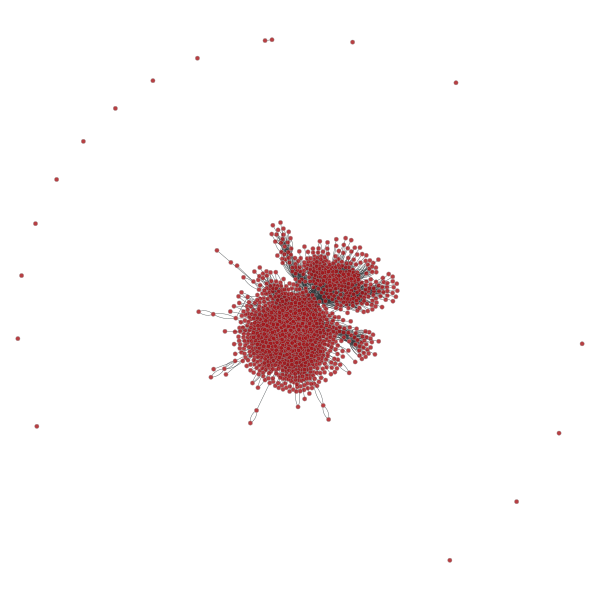

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fa27f2f45d0, at 0x7fa2330eef90>

In [8]:
%matplotlib inline

graph_draw(g)

In [9]:
from sklearn.metrics import roc_auc_score

In [10]:
features = tools.TopologicalFeatures(g, pos)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.dist])
roc_auc_score(Y, X)

0.94476071950348639

In [11]:
features = tools.TopologicalFeatures(g, pos)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.preferential_attachment])
roc_auc_score(Y, X)

0.94359405917361439

In [12]:
features = tools.TopologicalFeatures(g, pos)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.Adamic_Adar_coefficient])
roc_auc_score(Y, X)

0.96640206471586254

In [13]:
features = tools.TopologicalFeatures(g, pos)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.common_neighbors])
roc_auc_score(Y, X)

0.96363395211817715

In [120]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)

matrix = tools.make_sparse_matrix(train_set, nodes, poss_set)

features = tools.MFFeatures(model, matrix)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.score])
roc_auc_score(Y, X)

0.95075219005263811

# Cross validation

In [ ]:
files = [
    'data/structral/PowerGrid/train.in',
    'data/structral/euroroad/train.in',
    'data/structral/airport/train.in',
]

for file in files:
    for N in [90, 80, 70, 60, 50, 40, 30, 20, 10]:
        cross_validation.cross_validation(file, N, 10)

In [2]:
import cross_validation
file = 'data/structral/PowerGrid/train.in'
N = 10
cross_validation.cross_validation(file, N, 5)

NMF-10 : 0.59 (+/- 0.08)
svds-30 : 0.70 (+/- 0.06)
PA : 0.45 (+/- 0.03)
CN : 0.59 (+/- 0.01)
Adamic-Adar : 0.59 (+/- 0.01)
NMF-30 : 0.71 (+/- 0.06)
svds-10 : 0.53 (+/- 0.12)
sfdp-default : 0.82 (+/- 0.05)


In [1]:
import cross_validation
file = 'data/structral/euroroad/train.in'
N = 10
cross_validation.cross_validation(file, N, 5)

NMF-10 : 0.67 (+/- 0.07)
svds-30 : 0.62 (+/- 0.05)
PA : 0.34 (+/- 0.06)
CN : 0.53 (+/- 0.02)
Adamic-Adar : 0.53 (+/- 0.02)
NMF-30 : 0.65 (+/- 0.05)
svds-10 : 0.65 (+/- 0.08)
sfdp-default : 0.76 (+/- 0.05)


In [7]:
import cross_validation
file = 'data/structral/airport/train.in'
N = 10
cross_validation.cross_validation(file, N, 1)

NMF-10 : 0.97 (+/- 0.00)
svds-30 : 0.95 (+/- 0.00)
PA : 0.94 (+/- 0.00)
CN : 0.97 (+/- 0.00)
Adamic-Adar : 0.97 (+/- 0.00)
NMF-30 : 0.98 (+/- 0.00)
svds-10 : 0.96 (+/- 0.00)
sfdp-default : 0.94 (+/- 0.00)


In [2]:
import cross_validation
file = 'data/structral/ca-cit-HepTh/train.in'
N = 10
cross_validation.cross_validation(file, N, 5, max_iter=4)

sfdp-bipartite-repulse-allrepulse-all : nan (+/- nan)
PA : 0.91 (+/- 0.00)
sfdp-bipartite-repulse-fellowsrepulse-fellows : nan (+/- nan)
NMF-10 : 0.94 (+/- 0.00)
sfdp-bipartite-repulse-fellowsrepulse-all : nan (+/- nan)
sfdp-bipartite-repulse-aliensrepulse-aliens : nan (+/- nan)
sfdp-directed : nan (+/- nan)
svds-30 : 0.97 (+/- 0.00)
sfdp-bipartite-repulse-allrepulse-fellows : nan (+/- nan)
sfdp-bipartite-repulse-aliensrepulse-all : nan (+/- nan)
sfdp-bipartite-repulse-aliensrepulse-fellows : nan (+/- nan)
sfdp-bipartite-repulse-allrepulse-aliens : nan (+/- nan)
sfdp-bipartite-repulse-fellowsrepulse-aliens : nan (+/- nan)
sfdp-default : 0.82 (+/- 0.01)


/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import cross_validation
file = 'data/structral/reactome/train.in'
N = 90
cross_validation.cross_validation(file, N, 1, max_iter=5)

In [2]:
import cross_validation
file = 'data/structral/facebook/train.in'
N = 90
cross_validation.cross_validation(file, N, 1, max_iter=4)

KeyboardInterrupt: 

In [ ]:
import cross_validation
file = 'data/structral/facebook/train.in'
N = 10
cross_validation.cross_validation(file, N, 1, max_iter=50)

for N in [90, 80, 70, 60, 50, 40, 30, 20]:
    cross_validation.cross_validation(file, N, 1, max_iter=50)

In [1]:
import cross_validation
file = 'data/structral/Conflict/train.in'
N = 10
cross_validation.cross_validation(file, N, 5)

svds-30 : 0.63 (+/- 0.10)
NMF-10 : 0.65 (+/- 0.09)
sfdp-bipartite-simple : nan (+/- nan)
PA : 0.69 (+/- 0.04)
sfdp-default : 0.68 (+/- 0.12)


/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
import cross_validation
file = 'data/structral/EuroSiS/train.in'
N = 10
cross_validation.cross_validation(file, N, 5)

svds-30 : 0.88 (+/- 0.01)
NMF-10 : 0.91 (+/- 0.02)
sfdp-bipartite-simple : nan (+/- nan)
PA : 0.77 (+/- 0.01)
sfdp-default : 0.89 (+/- 0.03)


# AUC per user

In [127]:
import tools
from graph_tool.all import *
import random
file = 'data/structral/euroroad/train.in'
N = 5
K = 50

def sample_nodes(nodes, SIZE_NODES):
    import random
    nodes_set = set(random.sample(nodes, SIZE_NODES))
    return nodes_set

def sample_edges(g, nodes, SIZE_EDGES):
    edges = {}
    poss_set = set()
    all_set = set(g.vertices())
    for node in nodes:
        if len(set(g.vertex(node).out_neighbours())) == 0:
            continue
        edges[node] = []
        neighbours = set(g.vertex(node).out_neighbours())
        no_neighbours = all_set - neighbours - set([node])
        if len(neighbours) + len(no_neighbours) + 1 != len(all_set):
            print "Error", node
        for i in range(SIZE_EDGES):
            u = random.sample(neighbours, 1)[0]
            w = random.sample(no_neighbours, 1)[0]
            edges[node].append([u, w])
            poss_set.add(str(u) + ' ' + str(w))
    return edges, poss_set

def sample_structural_for_per_user_auc(file, N, K):
    train_set, left_nodes, right_nodes = tools.read_train(file)
    nodes = left_nodes | right_nodes | set([0])

    g = Graph(directed=False)
    g.add_vertex(max(nodes) + 1)
    for edge in train_set:
        u, w = map(int, edge.split())
        g.add_edge(g.vertex(u), g.vertex(w))

    SIZE_NODES = int(N * len(nodes) / 100.)
    SIZE_EDGES = int(K * len(nodes) / 100.)
    
    nodes_set = sample_nodes(nodes, SIZE_NODES)
    all_set = set(nodes)
    
    auc_edges, poss_set = sample_edges(g, nodes, SIZE_EDGES)
    
    return train_set, left_nodes | right_nodes, poss_set, auc_edges

In [128]:
train_set, nodes, poss_set, auc_edges = sample_structural_for_per_user_auc(file, N, K)

In [131]:
from graph_tool.all import *
g = Graph(directed=False)
g.add_vertex(max(nodes) + 1)

a = 0
for edge in train_set:
    #if edge not in poss_set:
    a += 1
    u, w = map(int, edge.split())
    g.add_edge(g.vertex(u), g.vertex(w))
print 1.0 * a / len(train_set)

pos = sfdp_layout(g)

1.0


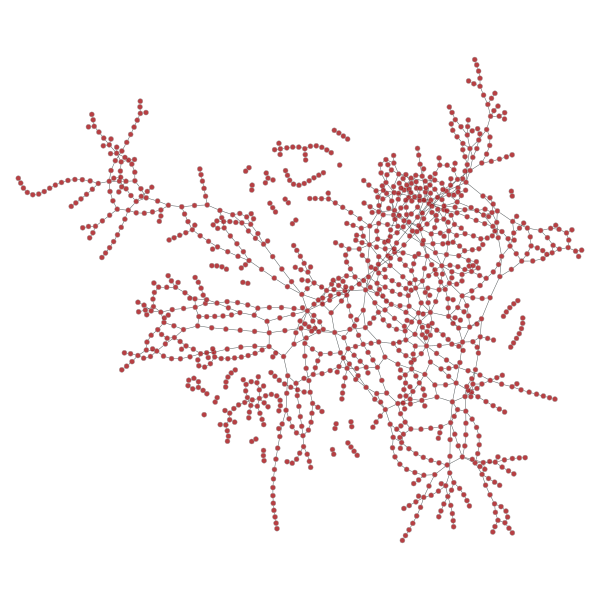

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2fca6eb10, at 0x7fc2fcde0bd0>

In [132]:
%matplotlib inline

graph_draw(g)

In [133]:
features = tools.TopologicalFeatures(g, pos)

In [134]:
def auc_per_user(pos, edges, func):
    auc_aver = 0.
    for node in edges:
        auc = 0.
        for u, w in edges[node]:
            if func(node, u) > func(node, w):
                auc += 1
        auc /= len(edges[node])
        auc_aver += auc
    return auc_aver/len(edges)

In [135]:
auc_per_user(pos, auc_edges, features.dist)

0.9988875188620724

In [136]:
auc_per_user(pos, auc_edges, features.preferential_attachment)

0.45662558038547624

In [124]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)

matrix = tools.make_sparse_matrix(train_set, nodes, poss_set)

features = tools.MFFeatures(model, matrix)
auc_per_user(pos, auc_edges, features.score)

0.935662898252826

In [125]:
from scipy.sparse import linalg
import numpy

matrix = tools.make_sparse_matrix(train_set, nodes, poss_set)
U, s, Vh = linalg.svds(matrix.asfptype(), k=30)

def score(u, w):
    return numpy.dot(U[u] * s, Vh.T[w])

features = tools.MFFeatures(model, matrix)
auc_per_user(pos, auc_edges, score)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.9461459403905444